In [1]:
import numpy as np
import pandas as pd

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
queen_train_path = "../../feature_extraction/MFCCs_120_features/train/train_queen.npy"
queenless_train_path = "../../feature_extraction/MFCCs_120_features/train/train_queenless.npy"
queen_test_path = "../../feature_extraction/MFCCs_120_features/test/train_queen.npy"
queenless_test_path = "../../feature_extraction/MFCCs_120_features/test/train_queenless.npy"
queen_val_path = "../../feature_extraction/MFCCs_120_features/val/train_queen.npy"
queenless_val_path = "../../feature_extraction/MFCCs_120_features/val/train_queenless.npy"

In [3]:
queen_train = np.load(queen_train_path)
queenless_train = np.load(queenless_train_path)
queen_test = np.load(queen_test_path)
queenless_test = np.load(queenless_test_path)
queen_val = np.load(queen_val_path)
queenless_val = np.load(queenless_val_path)


In [4]:
train_label = pd.DataFrame(np.hstack([[0]*7000, [1]*7000]).T, columns=['labels'])


In [5]:
train_data = pd.DataFrame(np.vstack([queen_train, queenless_train]))



In [6]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-531.931335,136.621933,45.603500,19.686640,6.475194,6.768497,-0.932306,6.658151,3.660365,2.098238,...,0.570186,0.320959,0.006495,-0.270113,0.139278,0.067575,-0.516784,-0.046881,0.014460,0.003147
1,-536.993347,138.456238,34.898472,20.860229,4.066461,3.119111,-2.870780,0.477826,3.070781,0.220865,...,-0.051452,0.290026,-0.269145,0.264718,-0.076976,0.608607,0.934239,0.273899,0.000403,-0.306786
2,-525.730591,136.192719,36.625347,23.067327,0.258045,4.746896,-0.178224,2.476325,7.398917,3.634185,...,-0.609370,0.094595,0.044024,0.358880,-0.144808,0.365466,-0.464897,-0.165750,0.660788,-0.180885
3,-540.449829,139.705780,29.665409,21.128056,3.132750,0.994988,0.255035,-0.820775,1.864982,0.350622,...,0.716817,-0.049078,-0.453621,0.088681,-0.328609,0.328395,0.193192,-0.516294,-0.462067,0.168489
4,-543.696594,144.002136,36.112610,24.168007,2.962288,3.031038,-5.003596,1.735093,2.667939,1.482007,...,0.054227,-0.246091,-0.282065,-0.383057,0.160219,-0.130766,-0.270557,-0.059051,0.229662,0.101521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,-586.455139,137.282516,34.373566,17.421253,10.941988,4.078198,11.242457,5.941251,6.012725,8.022065,...,-0.450183,0.965606,-0.570772,-0.175857,-0.189699,-0.262836,-0.114618,-0.211263,-0.426344,-0.206189
13996,-572.707092,143.127991,32.171494,18.097290,9.731588,5.532512,8.742662,3.005665,5.201865,7.527236,...,-0.541024,-0.036208,0.064136,0.172743,0.273442,0.164132,0.202071,0.143472,-0.065293,0.140826
13997,-579.057922,134.726349,32.156475,19.218019,5.755665,3.477601,12.935046,6.404186,5.639282,6.843115,...,0.081360,0.114623,0.149935,-0.411406,-0.712067,-0.043616,-0.173554,0.070652,0.249094,0.169053
13998,-578.548889,141.396133,31.506187,20.068113,6.832242,3.192559,11.349093,4.352320,4.009240,5.281808,...,0.718840,0.042336,-0.123666,-0.426403,-0.258308,-0.627793,0.813990,-0.069986,0.634146,-0.158976


In [7]:
queenless_test.shape

(2000, 120)

In [8]:
test_label = pd.DataFrame(np.hstack([[0]*3000, [1]*3000]).T, columns=['labels'])
test_data = pd.DataFrame(np.vstack([queen_test, queen_val, queenless_test, queenless_val]))



In [9]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_data)

In [11]:
X_test_scaled = scaler.transform(test_data)

In [12]:
X_scaled

array([[-0.20656753, -1.05254159,  1.80653149, ..., -0.19613678,
        -0.00647705, -0.02666496],
       [-0.28666657, -0.89583887,  0.62970205, ...,  0.72116803,
        -0.04692092, -0.92538161],
       [-0.10844967, -1.08920894,  0.81954159, ..., -0.53605356,
         1.85312829, -0.56030407],
       ...,
       [-0.95227791, -1.21447935,  0.32826777, ...,  0.13996093,
         0.66860808,  0.45441761],
       [-0.94422319, -0.64468669,  0.25678009, ..., -0.26220606,
         1.77647378, -0.49677608],
       [-1.04496897, -1.09106518,  0.24471263, ..., -0.14419571,
        -1.10450746, -0.43586661]])

In [13]:
from sklearn.model_selection import RandomizedSearchCV

In [14]:
n_neighbors = [int(x) for x in np.arange(5, 21)]

KNN_search = { 'n_neighbors' : n_neighbors,
              'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [15]:
import time
t1 = time.time()
base_model = KNeighborsClassifier()

clf = RandomizedSearchCV(base_model, KNN_search, scoring='accuracy', n_iter=50, random_state=1337, verbose=3)
clf.fit(X_scaled, np.array(train_label).ravel())
# clf.grid_scores_
t2 = time.time()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=13, weights=distance;, score=0.675 total time=   6.9s
[CV 2/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=13, weights=distance;, score=0.836 total time=   5.8s
[CV 3/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=13, weights=distance;, score=0.723 total time=   6.2s
[CV 4/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=13, weights=distance;, score=0.784 total time=   6.3s
[CV 5/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=13, weights=distance;, score=0.741 total time=   8.0s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=9, weights=distance;, score=0.683 total time=   0.3s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=9, weights=distance;, score=0.830 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=9, weights=distance;, score=0.724 total time=   0.0s
[CV 4/5] END algori

In [16]:
clf.best_params_


{'weights': 'distance',
 'n_neighbors': 16,
 'metric': 'manhattan',
 'algorithm': 'kd_tree'}

In [17]:
print(f"time elapsed: {t2-t1} seconds or {int((t2-t1)//60)} minutes and {int((t2-t1)-(t2-t1)//60*60)} seconds")

time elapsed: 919.7802400588989 seconds or 15 minutes and 19 seconds


In [18]:
print(accuracy_score(test_label,clf.predict(X_test_scaled)))

0.9145


In [19]:
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay


In [20]:
print(classification_report(test_label,clf.predict(X_test_scaled), target_names=["Queen", "Queenless"]))

              precision    recall  f1-score   support

       Queen       0.87      0.97      0.92      3000
   Queenless       0.96      0.86      0.91      3000

    accuracy                           0.91      6000
   macro avg       0.92      0.91      0.91      6000
weighted avg       0.92      0.91      0.91      6000



In [21]:
roc_curve(test_label,clf.predict(X_test_scaled))

(array([0.   , 0.032, 1.   ]),
 array([0.   , 0.861, 1.   ]),
 array([inf,  1.,  0.]))

In [22]:
import matplotlib.pyplot as plt

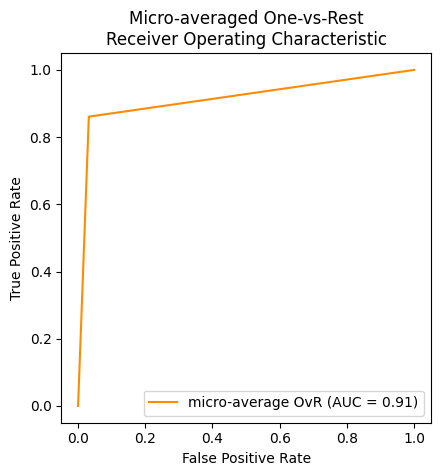

In [23]:
RocCurveDisplay.from_predictions(
    np.array(test_label.values).ravel(),
    np.array(clf.predict(X_test_scaled)).ravel(),
    name="micro-average OvR",
    color="darkorange",

)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay, roc_auc_score, auc

fpr, tpr, thresholds = roc_curve(test_label, clf.predict_proba(X_test_scaled)[:, 1])

auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="ROC curve (area = {0:.2f})".format(auc))
plt.plot([0, 1], [0, 1], linestyle="dashed")
# plt.title("FFT 1D with XGBoost roc_curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns

cf_mat = confusion_matrix(test_label, clf.predict(X_test_scaled))
df_cm = pd.DataFrame(cf_mat, index = [i for i in ['Queen', 'Queenless']],
                  columns = [i for i in ['Queen', 'Queenless']])
df_cm_normed = df_cm/df_cm.sum()
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="", )


In [ ]:
df_cm_normed = df_cm/df_cm.sum()
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_normed, annot=True, fmt=".3f", )